<a href="https://colab.research.google.com/github/bountyhunter12/kaggle_competition-/blob/main/AdvanceHousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kaggle Handle: https://www.kaggle.com/faoziafariha

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/housePred/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [6]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

<Axes: >

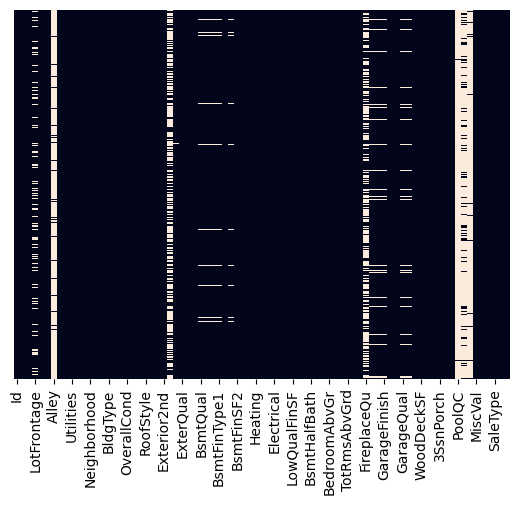

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# fill the missing value
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [11]:
df.drop(['Alley'],axis=1,inplace=True)

In [12]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [14]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
df.shape

(1460, 76)

In [17]:
df.drop(['Id'],axis=1,inplace=True)

In [18]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
dtype: int64

In [19]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<Axes: >

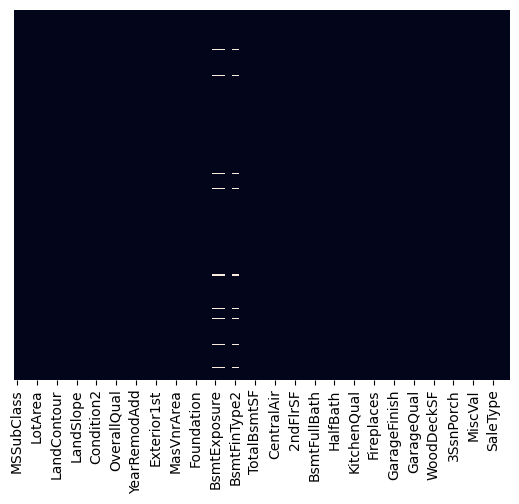

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [21]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

<Axes: >

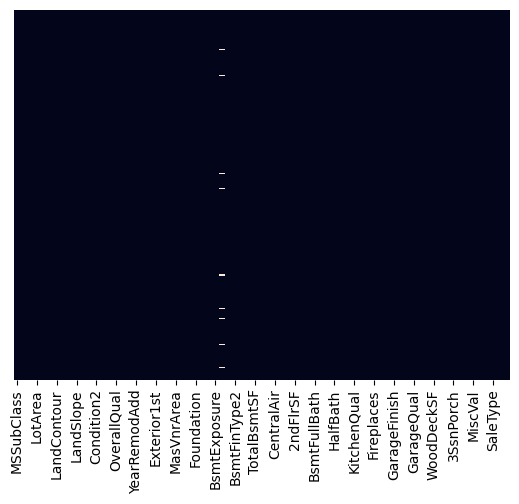

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

In [25]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

In [26]:
# Handle catagorical features

In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final


In [30]:
main_df=df.copy()

In [31]:
# Combine Test Data

test_df=pd.read_csv('/content/drive/MyDrive/housePred/formulatedtest (1).csv')

In [32]:
test_df.shape

(1459, 74)

In [33]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RH         80.0    11622   Pave      Reg         Lvl   
1          20       RL         81.0    14267   Pave      IR1         Lvl   
2          60       RL         74.0    13830   Pave      IR1         Lvl   
3          60       RL         78.0     9978   Pave      IR1         Lvl   
4         120       RL         43.0     5005   Pave      IR1         HLS   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...           0             0         0   
1    AllPub    Corner       Gtl  ...          36             0         0   
2    AllPub    Inside       Gtl  ...          34             0         0   
3    AllPub    Inside       Gtl  ...          36             0         0   
4    AllPub    Inside       Gtl  ...          82             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0         120        0        0       6    2010        WD        Normal  
1           0        0    12500       6    2010        WD        Normal  
2           0        0        0       3    2010        WD        Normal  
3           0        0        0       6    2010        WD        Normal  
4         144        0        0       1    2010        WD        Normal  

[5 rows x 74 columns]

In [34]:
final_df = pd.concat([df,test_df],axis=0)

In [35]:
pd.set_option('display.max_rows', None)
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780.0
59      124900.0
60      158000.0
61      101000.0
62      202500.0
63      140000.0
64      219500.0
65      317000.0
66      180000.0
67      226000.0
68       80000.0
69      225000.0
70      244000.0
71      129500.0
72      185000.0
73      144900.0
74      107400.0
75       91000.0
76      135750.0
77      127000.0
78      136500.0
79      110000.0
80      193500.0
81      153500.0
82      245000.0
83      126500.0
84      168500.0
85      260000.0
86      174000.0
87      164500.0
88       85000.0
89      123600.0
91       98600.0
92      163500.0
93      133900.0
94      204750.0
95      185000.0
96      214000.0
97       94750.0
98       83000.0
99      128950.0
100     205000.0
101     178000.0
103     198900.0
104     169500.0
105     250000.0
106     100000.0
107     115000.0
108     115000.0
109     190000.0
110     136900.0
111     180000.0
112     383970.0
113     217000.0
114     259500.0
115     176000.0
116     139000.0
117     155000.0
118     320000.0
119     163990.0
120     180000.0
121     100000.0
122     136000.0
123     153900.0
124     181000.0
125      84500.0
126     128000.0
127      87000.0
128     155000.0
129     150000.0
130     226000.0
131     244000.0
132     150750.0
133     220000.0
134     180000.0
135     174000.0
136     143000.0
137     171000.0
138     230000.0
139     231500.0
140     115000.0
141     260000.0
142     166000.0
143     204000.0
144     125000.0
145     130000.0
146     105000.0
147     222500.0
148     141000.0
149     115000.0
150     122000.0
151     372402.0
152     190000.0
153     235000.0
154     125000.0
155      79000.0
157     269500.0
158     254900.0
159     320000.0
160     162500.0
161     412500.0
162     220000.0
163     103200.0
164     152000.0
165     127500.0
166     190000.0
167     325624.0
168     183500.0
169     228000.0
170     128500.0
171     215000.0
172     239000.0
173     163000.0
174     184000.0
175     243000.0
176     211000.0
177     172500.0
178     501837.0
179     100000.0
180     177000.0
181     200100.0
183     200000.0
184     127000.0
185     475000.0
186     173000.0
187     135000.0
188     153337.0
189     286000.0
190     315000.0
191     184000.0
192     192000.0
193     130000.0
194     127000.0
195     148500.0
196     311872.0
197     235000.0
198     104000.0
199     274900.0
200     140000.0
201     171500.0
202     112000.0
203     149000.0
204     110000.0
205     180500.0
206     143900.0
207     141000.0
208     277000.0
209     145000.0
210      98000.0
211     186000.0
212     252678.0
213     156000.0
214     161750.0
215     134450.0
216     210000.0
217     107000.0
218     311500.0
219     167240.0
220     204900.0
221     200000.0
222     179900.0
223      97000.0
224     386250.0
225     112000.0
226     290000.0
227     106000.0
228     125000.0
229     192500.0
230     148000.0
231     403000.0
232      94500.0
233     128200.0
234     216500.0
235      89500.0
236     185500.0
237     194500.0
238     318000.0
239     113000.0
240     262500.0
241  

In [36]:
final_df.shape

(2881, 75)

In [37]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
final_df.shape

(2881, 234)

In [39]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2881, 174)

In [41]:
final_df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60    65.000000     8450            7            5       2003   
1             20    80.000000     9600            6            8       1976   
2             60    68.000000    11250            7            5       2001   
3             70    60.000000     9550            7            5       1915   
4             60    84.000000    14260            8            5       2000   
5             50    85.000000    14115            5            5       1993   
6             20    75.000000    10084            8            5       2004   
7             60    70.049958    10382            7            6       1973   
8             50    51.000000     6120            7            5       1931   
9            190    50.000000     7420            5            6       1939   
10            20    70.000000    11200            5            5       1965   
11            60    85.000000    11924            9            5       2005   
12            20    70.049958    12968            5            6       1962   
13            20    91.000000    10652            7            5       2006   
14            20    70.049958    10920            6            5       1960   
15            45    51.000000     6120            7            8       1929   
16            20    70.049958    11241            6            7       1970   
18            20    66.000000    13695            5            5       2004   
19            20    70.000000     7560            5            6       1958   
20            60   101.000000    14215            8            5       2005   
21            45    57.000000     7449            7            7       1930   
22            20    75.000000     9742            8            5       2002   
23           120    44.000000     4224            5            7       1976   
24            20    70.049958     8246            5            8       1968   
25            20   110.000000    14230            8            5       2007   
26            20    60.000000     7200            5            7       1951   
27            20    98.000000    11478            8            5       2007   
28            20    47.000000    16321            5            6       1957   
29            30    60.000000     6324            4            6       1927   
30            70    50.000000     8500            4            4       1920   
31            20    70.049958     8544            5            6       1966   
32            20    85.000000    11049            8            5       2007   
33            20    70.000000    10552            5            5       1959   
34           120    60.000000     7313            9            5       2005   
35            60   108.000000    13418            8            5       2004   
36            20   112.000000    10859            5            5       1994   
37            20    74.000000     8532            5            6       1954   
38            20    68.000000     7922            5            7       1953   
40            20    84.000000     8658            6            5       1965   
41            20   115.000000    16905            5            6       1959   
42            85    70.049958     9180            5            7       1983   
43            20    70.049958     9200            5            6       1975   
44            20    70.000000     7945            5            6       1959   
45           120    61.000000     7658            9            5       2005   
46            50    48.000000    12822            7            5       2003   
47            20    84.000000    11096            8            5       2006   
48           190    33.000000     4456            4            5       1920   
49            20    66.000000     7742            5            7       1966   
50            60    70.049958    13869            6            6       1997   
51            50    52.000000     6240            6     

In [42]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [43]:
df_Train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...   Min1   Min2   Typ  \
0          2003       196.0       706.0         0.0  ...  False  False  True   
1          1976         0.0       978.0         0.0  ...  False  False  True   
2          2002       162.0       486.0         0.0  ...  False  False  True   
3          1970         0.0       216.0         0.0  ...  False  False  True   
4          2000       350.0       655.0         0.0  ...  False  False  True   

   Attchd  Basment  BuiltIn  CarPort  Detchd    RFn      P  
0    True    False    False    False   False   True  False  
1    True    False    False    False   False   True  False  
2    True    False    False    False   False   True  False  
3   False    False    False    False    True  False  False  
4    True    False    False    False   False   True  False  

[5 rows x 174 columns]

In [44]:
df_Test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...   Min1   Min2   Typ  \
0          1961         0.0       468.0       144.0  ...  False  False  True   
1          1958       108.0       923.0         0.0  ...  False  False  True   
2          1998         0.0       791.0         0.0  ...  False  False  True   
3          1998        20.0       602.0         0.0  ...  False  False  True   
4          1992         0.0       263.0         0.0  ...  False  False  True   

   Attchd  Basment  BuiltIn  CarPort  Detchd    RFn      P  
0    True    False    False    False   False  False  False  
1    True    False    False    False   False  False  False  
2    True    False    False    False   False  False  False  
3    True    False    False    False   False  False  False  
4    True    False    False    False   False   True  False  

[5 rows x 174 columns]

In [45]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-45-8fdc58f80b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [46]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [47]:
# pip install --upgrade xgboost scikit-learn


In [48]:
import xgboost
import sklearn

print("XGBoost version:", xgboost.__version__)
print("scikit-learn version:", sklearn.__version__)


XGBoost version: 2.1.4
scikit-learn version: 1.6.1


In [49]:
# pip install xgboost==1.7.6


In [50]:
import xgboost as xgb

classifier = xgb.XGBRegressor(n_estimators=100, enable_categorical=False)
classifier.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# import xgboost as xgb

# # Initialize the regressor with explicit n_estimators
# classifier = xgb.XGBRegressor(n_estimators=100)

# # Fit the model
# classifier.fit(X_train, y_train)


In [52]:
import xgboost
regressor=xgboost.XGBRegressor()

In [53]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [54]:
# Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameter to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [55]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose =5,
            return_train_score = True,
            random_state=42)

In [56]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [64]:
random_cv.best_estimator_.objective

'reg:squarederror'

In [68]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1,missing=np.nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, objective='reg:squarederror', reg_alpha=None, reg_lambda=1, scale_pos_weight=1, seed=None,slient=True, subsample=1)

In [69]:
regressor.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:11:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "slient" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [71]:
y_pred=regressor.predict(df_Test)

In [72]:
y_pred

array([118891.4  , 160515.81 , 184719.48 , ..., 171136.38 , 120518.234,
       235145.02 ], dtype=float32)

In [73]:
rf_pred=regressor.predict(df_Test)

In [74]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('/content/drive/MyDrive/housePred/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('/content/sample_submission.csv',index=False)

In [75]:
rf_pred=pd.DataFrame(rf_pred)
sub_df=pd.read_csv('/content/drive/MyDrive/housePred/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],rf_pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

<Axes: >

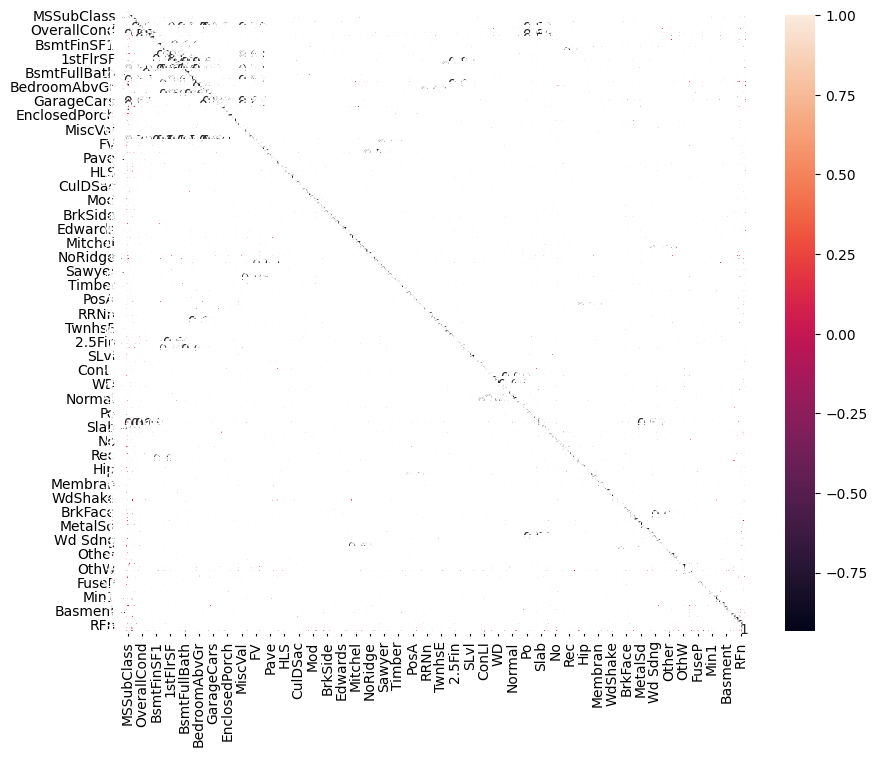

In [76]:
corr = df_Train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [77]:
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.362043 -0.139992     0.036191    -0.060814   
LotFrontage     -0.362043     1.000000  0.305044     0.234329    -0.055042   
LotArea         -0.139992     0.305044  1.000000     0.104275    -0.006499   
OverallQual      0.036191     0.234329  0.104275     1.000000    -0.122899   
OverallCond     -0.060814    -0.055042 -0.006499    -0.122899     1.000000   
YearBuilt        0.031093     0.115359  0.012959     0.571984    -0.389193   
YearRemodAdd     0.042898     0.079438  0.009580     0.541770     0.055335   
MasVnrArea       0.023030     0.178678  0.103176     0.405568    -0.132775   
BsmtFinSF1      -0.068886     0.214821  0.214007     0.215212    -0.061424   
BsmtFinSF2      -0.065831     0.042224  0.110531    -0.071277     0.036865   
BsmtUnfSF       -0.142483     0.119323 -0.006890     0.278585    -0.160247   
TotalBsmtSF     -0.255631     0.384164  0.275398     0.509802    -0.225340   
1stFlrSF        -0.256527     0.416189  0.299586     0.485737    -0.150685   
2ndFlrSF         0.306586     0.071878  0.050495     0.288025     0.023926   
LowQualFinSF     0.047464     0.036434  0.004083    -0.035019     0.023950   
GrLivArea        0.070948     0.369097  0.262580     0.593344    -0.088607   
BsmtFullBath     0.005988     0.088901  0.157161     0.086160    -0.067957   
BsmtHalfBath    -0.001664    -0.007503  0.047376    -0.049992     0.116427   
FullBath         0.116260     0.183662  0.128485     0.574951    -0.194613   
HalfBath         0.182864     0.045212  0.012019     0.258067    -0.072294   
BedroomAbvGr    -0.033308     0.240058  0.121130     0.092545     0.014602   
KitchenAbvGr     0.260515     0.002804 -0.008668    -0.144965    -0.069316   
TotRmsAbvGrd     0.028440     0.324059  0.191219     0.435031    -0.060718   
Fireplaces      -0.041578     0.234933  0.270758     0.389639    -0.034171   
GarageCars      -0.036940     0.270827  0.153865     0.609183    -0.195287   
GarageArea      -0.096081     0.325732  0.179592     0.563758    -0.164222   
WoodDeckSF      -0.013994     0.075983  0.170824     0.227744    -0.011715   
OpenPorchSF     -0.005830     0.136165  0.082454     0.302445    -0.043179   
EnclosedPorch   -0.018032     0.011248 -0.018247    -0.124064     0.071403   
3SsnPorch       -0.040928     0.064745  0.020972     0.031165     0.023000   
ScreenPorch     -0.025644     0.036625  0.042393     0.057339     0.051951   
PoolArea         0.008604     0.181033  0.077576     0.064737    -0.002982   
MiscVal         -0.022506     0.000781  0.041385    -0.025720     0.070854   
MoSold          -0.017064     0.007046 -0.001318     0.066874    -0.007870   
YrSold          -0.026976     0.006179 -0.014498    -0.026207     0.049273   
SalePrice       -0.084471     0.335397  0.263815     0.787985    -0.095475   
FV               0.174558    -0.092019 -0.084780     0.169584    -0.110477   
RH               0.055961    -0.042085 -0.033111    -0.066883     0.000864   
RL              -0.346844     0.329002  0.206189     0.142223    -0.068690   
RM               0.280105    -0.311068 -0.175394    -0.210504     0.160612   
Pave            -0.025519    -0.037136 -0.197243     0.062922     0.044444   
IR2             -0.019740     0.031314  0.225987     0.078620    -0.006245   
IR3             -0.031434     0.180652  0.256683     0.040438    -0.059987   
Reg              0.117807    -0.164130 -0.215752    -0.191673     0.030260   
HLS             -0.010286     0.062431  0.089177     0.100159    -0.005286   
Low             -0.025109     0.052329  0.372084    -0.030476    -0.033548   
Lvl              0.009765    -0.091403 -0.262425     0.014213    -0.023769   
NoSeWa          -0.023099    -0.000115  0.010054    -0.002869     0.009788   
CulDSac         -0.039824    -0.059758  0.179679     0.080942     0.019725   
FR2              0.013017    -0.039306 -0.002514     0.012398    -0.022119   
FR3              0.044924     0.00144

In [78]:
columns = np.full(corr.shape[0],True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [79]:
selected_columns = df_Train.columns[columns]
df_Train = df_Train[selected_columns]

In [80]:
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,